In [49]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

import itertools

from sklearn import preprocessing

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [50]:
# Load the data using pandas
data1 = pd.read_excel('agro_tech.xlsx')
data2 = data1

In [51]:
# info() method is used to get quick description
# like, Number of Rows, Types of Attributes and Number of non-null
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   int64         
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   int64         
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Head Weight (g)       4754 non-null   float64       
 5   Radial Diameter (mm)  4754 non-null   float64       
 6   Polar Diameter (mm)   4754 non-null   float64       
 7   Diameter Ratio        4752 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4672 non-null   float64       
 10  Leaf Area (cm^2)      4857 non-null   float64       
 11  Square ID             4859 non-null   int64         
 12  Check Date            4859 non-null   datetime64[ns]
 13  Flight Date       

In [52]:
# method drop() is used to delete the column from the dataset
# list must follow the order, last index, 'Remove', can  not be mention first or inbetween
# inplace attribute will modify the original dataset, while its True
data1.drop(['Diameter Ratio', 'Density (kg/L)', 'Square ID', 'Remove'], axis=1, inplace=True)

In [53]:
# dictionary variable to rename the columns name
rename = {'Batch Number' : 'batchNumber', 'Plant Date' : 'PlantDate', 'Fresh Weight (g)' : 'fresh(g)', 'Head Weight (g)' : 'head(g)', 'Radial Diameter (mm)' : 'radial(mm)', 'Polar Diameter (mm)' : 'polar(mm)', 'Diameter Ratio' : 'ratio(mm)', 'Density (kg/L)' : 'density(kgpl)', 'Leaf Area (cm^2)' : 'leaf(cmsqr)', 'Check Date' : 'checkDate', 'Flight Date' : 'flightDate'}

In [54]:
# Assignning the above variable to change the name of the columns
data1.rename(columns = rename, inplace=True)

In [55]:
# method head() to see Top Five rows
data1.head()

,batchNumber,PlantDate,Class,fresh(g),head(g),radial(mm),polar(mm),Leaves,leaf(cmsqr),checkDate,flightDate
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.0,185.0,2020-04-30,NaT
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.0,156.0,2020-04-30,NaT
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.0,137.0,2020-04-30,NaT
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.0,225.0,2020-04-30,NaT
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.0,157.0,2020-04-30,NaT


In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   batchNumber  4859 non-null   int64         
 1   PlantDate    4685 non-null   datetime64[ns]
 2   Class        4859 non-null   int64         
 3   fresh(g)     4858 non-null   float64       
 4   head(g)      4754 non-null   float64       
 5   radial(mm)   4754 non-null   float64       
 6   polar(mm)    4754 non-null   float64       
 7   Leaves       100 non-null    float64       
 8   leaf(cmsqr)  4857 non-null   float64       
 9   checkDate    4859 non-null   datetime64[ns]
 10  flightDate   472 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(6), int64(2)
memory usage: 417.7 KB


In [57]:
# class column is having repetitive, means it is catagorical atribute.
# that can be known by value_counts() method
data1['Class'].value_counts()

1    1009
2     987
5     971
3     960
4     932
Name: Class, dtype: int64

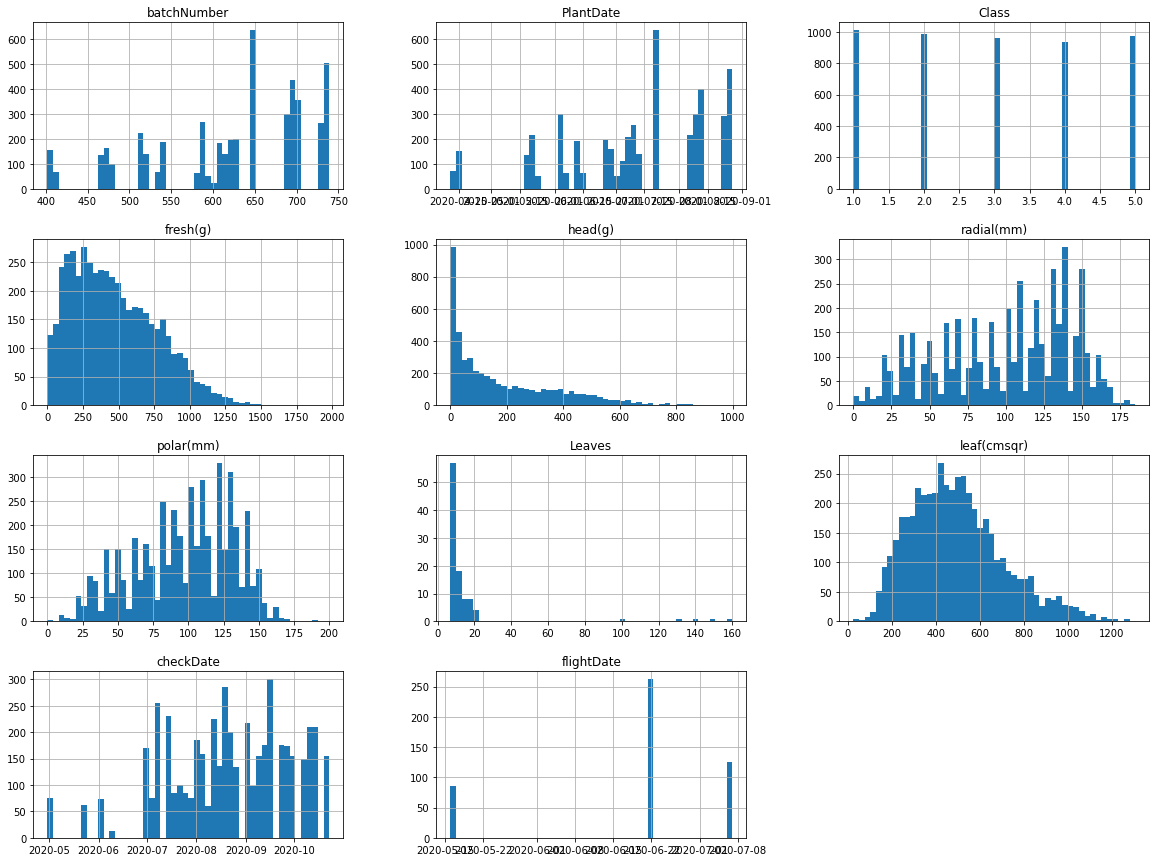

In [58]:
# plot histogram for each Numerical Attibutes
# which shows the Number of instances have given Range.
data1.hist(bins=50, figsize=(20,15))
plt.show()

In [59]:
# method to find Standard Correlation Coefficient
corr_matrix = data1.corr()

In [60]:
# strong positive correlation between fresh(g) and head(g)
corr_matrix['fresh(g)'].sort_values(ascending=False)

fresh(g)       1.000000
head(g)        0.911343
radial(mm)     0.864998
polar(mm)      0.773989
leaf(cmsqr)    0.236552
Leaves         0.055370
Class         -0.024851
batchNumber   -0.316563
Name: fresh(g), dtype: float64

In [61]:
corr_matrix['radial(mm)'].sort_values(ascending=False)

radial(mm)     1.000000
polar(mm)      0.905920
fresh(g)       0.864998
head(g)        0.809523
leaf(cmsqr)    0.191412
Class         -0.029475
batchNumber   -0.251041
Leaves              NaN
Name: radial(mm), dtype: float64

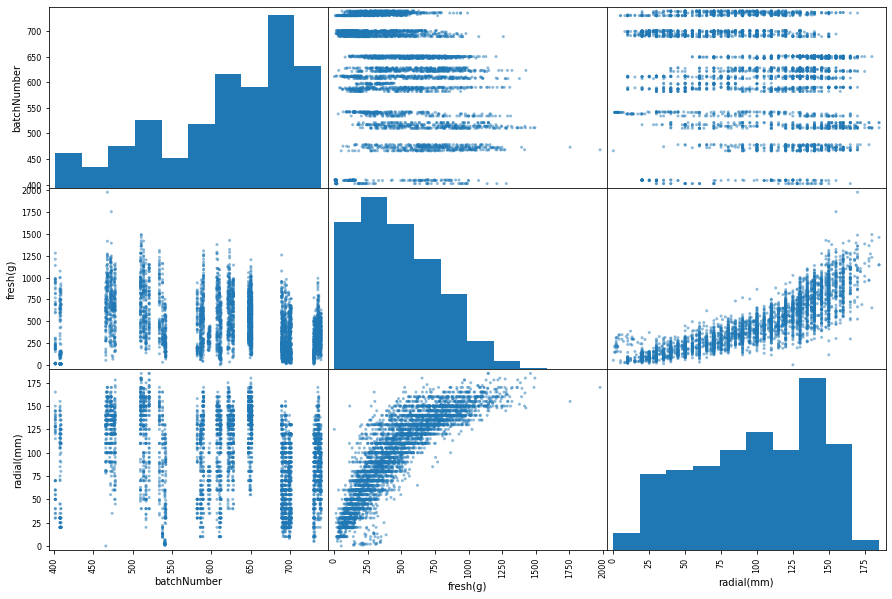

In [62]:
# visulalizing above correlation using scatter_mattrix
attributes = ['batchNumber','fresh(g)', 'radial(mm)']
scatter_matrix(data1[attributes], figsize=(15, 10))
plt.show()

In [63]:
# Machine learning donot responde correctly with missing data, so,
# filing data with its Median, and modifying original data

# there was only one missing, so filling with Median
median = data1['fresh(g)'].median()
data1['fresh(g)'].fillna(median, inplace=True)

# belove attributes are correlated, so filling with Median as well, for no
median = data1['head(g)'].median()
data1['head(g)'].fillna(median, inplace=True)

median = data1['radial(mm)'].median()
data1['radial(mm)'].fillna(median, inplace=True)

median = data1['polar(mm)'].median()
data1['polar(mm)'].fillna(median, inplace=True)

median = data1['Leaves'].median()
data1['Leaves'].fillna(median, inplace=True)

median = data1['leaf(cmsqr)'].median()
data1['leaf(cmsqr)'].fillna(median, inplace=True)

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   batchNumber  4859 non-null   int64         
 1   PlantDate    4685 non-null   datetime64[ns]
 2   Class        4859 non-null   int64         
 3   fresh(g)     4859 non-null   float64       
 4   head(g)      4859 non-null   float64       
 5   radial(mm)   4859 non-null   float64       
 6   polar(mm)    4859 non-null   float64       
 7   Leaves       4859 non-null   float64       
 8   leaf(cmsqr)  4859 non-null   float64       
 9   checkDate    4859 non-null   datetime64[ns]
 10  flightDate   472 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(6), int64(2)
memory usage: 417.7 KB


In [65]:
# number of raws and columns, from its Shape
data1.shape

(4859, 11)

In [66]:
# adding another column which is total days of plant to flight from planting
data1['grown_up'] = data1['flightDate'] - data1['PlantDate']

In [67]:
data1.head()

,batchNumber,PlantDate,Class,fresh(g),head(g),radial(mm),polar(mm),Leaves,leaf(cmsqr),checkDate,flightDate,grown_up
0,402,2020-04-11,3,15.0,115.0,109.0,100.0,10.0,185.0,2020-04-30,NaT,NaT
1,402,2020-04-11,4,15.0,115.0,109.0,100.0,11.0,156.0,2020-04-30,NaT,NaT
2,402,2020-04-11,1,16.0,115.0,109.0,100.0,12.0,137.0,2020-04-30,NaT,NaT
3,402,2020-04-11,3,15.0,115.0,109.0,100.0,10.0,225.0,2020-04-30,NaT,NaT
4,402,2020-04-11,3,15.0,115.0,109.0,100.0,11.0,157.0,2020-04-30,NaT,NaT


In [68]:
# dropping the values that are empty
# for examle Batch Number 402, takes 35 days to flight from the day of planting 
data1.dropna(subset=['grown_up']).head()

,batchNumber,PlantDate,Class,fresh(g),head(g),radial(mm),polar(mm),Leaves,leaf(cmsqr),checkDate,flightDate,grown_up
138,402,2020-04-11,4,696.0,282.0,122.0,95.0,9.5,480.0,2020-06-04,2020-05-16,35 days
139,402,2020-04-11,4,604.0,267.0,115.0,100.0,9.5,462.0,2020-06-04,2020-05-16,35 days
140,402,2020-04-11,4,689.0,320.0,128.0,108.0,9.5,485.0,2020-06-04,2020-05-16,35 days
141,402,2020-04-11,3,596.0,289.0,120.0,100.0,9.5,453.0,2020-06-04,2020-05-16,35 days
142,402,2020-04-11,5,636.0,294.0,124.0,96.0,9.5,431.0,2020-06-04,2020-05-16,35 days


In [69]:
# very simple Example for One Hot Coding
# only one attribute equal to one(Hot), otherwise 0
# very important for Categorical Attributes
d = ['a', 'b', 'd', 'c', 'a', 'a']
print(pd.get_dummies(d))

   a  b  c  d
0  1  0  0  0
1  0  1  0  0
2  0  0  0  1
3  0  0  1  0
4  1  0  0  0
5  1  0  0  0


In [70]:
# applying OneHotEncoding, for 'Class' attributes
data1_class = data1[['Class']]
cat_encoder =OneHotEncoder()
data1_1hot = cat_encoder.fit_transform(data1_class)
data1_1hot.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [71]:
# get_dummies() will transform all non-numerical values into numeric value
# for each column
data1_dummy = pd.get_dummies(data1)
data1_dummy.value_counts


<bound method DataFrame.value_counts of       batchNumber  PlantDate  Class  fresh(g)  head(g)  radial(mm)  polar(mm)  \
0             402 2020-04-11      3      15.0    115.0       109.0      100.0   
1             402 2020-04-11      4      15.0    115.0       109.0      100.0   
2             402 2020-04-11      1      16.0    115.0       109.0      100.0   
3             402 2020-04-11      3      15.0    115.0       109.0      100.0   
4             402 2020-04-11      3      15.0    115.0       109.0      100.0   
...           ...        ...    ...       ...      ...         ...        ...   
4854          738 2020-08-27      4     284.0     12.0        50.0       55.0   
4855          738 2020-08-27      5     199.0      8.0        45.0       85.0   
4856          738 2020-08-27      3     280.0     23.0        60.0       80.0   
4857          738 2020-08-27      4     247.0     10.0        45.0       80.0   
4858          738 2020-08-27      2     183.0     18.0        35.0   

In [72]:
# Creating/splitting a train and test set
# test_size=0.2, means 20% of splitting for test_set, 80% for train_set
# random_state=42, will make sure that  each time the output is same
train_set, test_set = train_test_split(data1, test_size=0.2, random_state=42)
print(len(train_set), len(test_set))

3887 972


In [73]:
# cut() will devide data into defined categories,
# and labeled it from 1 to 5, as shown below
data1['class_cat'] = pd.cut(data1['Class'],
                           bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                           labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

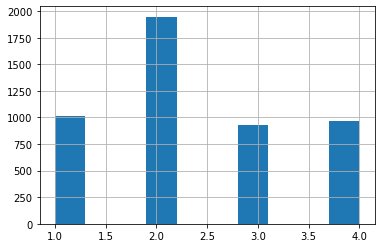

In [74]:
# plotting Histogram
data1['class_cat'].hist()

In [75]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data1, data1['class_cat']):
    start_train_set = data1.loc[train_index]
    start_test_set = data1.loc[test_index]

In [76]:
start_test_set['class_cat'].value_counts() / len(start_test_set)

2    0.401235
1    0.207819
4    0.199588
3    0.191358
5    0.000000
Name: class_cat, dtype: float64

In [77]:
data3 = start_train_set.copy()
data3

,batchNumber,PlantDate,Class,fresh(g),head(g),radial(mm),polar(mm),Leaves,leaf(cmsqr),checkDate,flightDate,grown_up,class_cat
4006,700,2020-08-11,1,406.0,124.0,95.0,80.0,9.5,341.0,2020-09-29,NaT,NaT,1
275,468,2020-05-19,1,1109.0,555.0,160.0,125.0,9.5,887.0,2020-07-01,NaT,NaT,1
3990,700,2020-08-11,3,213.0,41.0,70.0,70.0,9.5,238.0,2020-09-29,NaT,NaT,2
1934,610,2020-07-06,2,873.0,428.0,138.0,110.0,9.5,716.0,2020-08-14,NaT,NaT,2
3894,695,NaT,2,542.0,136.0,100.0,100.0,9.5,601.0,2020-09-28,NaT,NaT,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,628,2020-07-12,1,611.0,282.0,112.0,125.0,9.5,407.0,2020-08-19,NaT,NaT,1
1759,589,2020-06-29,1,809.0,464.0,150.0,120.0,9.5,295.0,2020-08-12,NaT,NaT,1
4694,735,2020-08-26,5,403.0,35.0,70.0,96.0,9.5,659.0,2020-10-14,NaT,NaT,4
1266,586,2020-06-26,5,156.0,3.0,30.0,30.0,9.5,250.0,2020-07-28,NaT,NaT,4


In [78]:
data3 = start_train_set.drop('fresh(g)', axis=1)
data3_labels = start_train_set['fresh(g)'].copy()

In [79]:
lin_reg= LinearRegression()
# lin_reg.fit()
# lin_mse = mse()
# lin_rmse = np.sqrt(lin_mse)

In [80]:
tree_reg = DecisionTreeRegressor()
# tree_red.fit()
# tree_mse = mse()
# tree_rmse = np.sqrt(tree_mse)